<a href="https://colab.research.google.com/github/irenezhou709/python-mortagage-approval-threshold/blob/main/Python_Data_Visualization_Mortagage_Approval_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/wlifferth/ghw-2023-02

Cloning into 'ghw-2023-02'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), 152.98 KiB | 1.26 MiB/s, done.


In [ ]:
import pandas as pd

df = pd.read_csv('ghw-2023-02/loan_applications.csv')

In [ ]:
df.head()

,race,credit_score,zipcode,will_default
0,hispanic,498,71202,False
1,white,812,71204,False
2,white,604,71203,True
3,black,339,71207,True
4,hispanic,582,71205,False


In [ ]:
df['race']

0       hispanic
1          white
2          white
3          black
4       hispanic
          ...   
5026       white
5027       asian
5028       black
5029       black
5030       asian
Name: race, Length: 5031, dtype: object

In [ ]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print()

race
white       1846
asian       1224
hispanic    1051
black        910
Name: race, dtype: int64

credit_score
666    25
720    23
642    23
745    22
721    21
       ..
366     2
465     1
375     1
413     1
549     1
Name: credit_score, Length: 551, dtype: int64

zipcode
71202    874
71204    711
71206    651
71200    636
71203    580
71201    550
71205    521
71207    508
Name: zipcode, dtype: int64

will_default
False    3134
True     1897
Name: will_default, dtype: int64



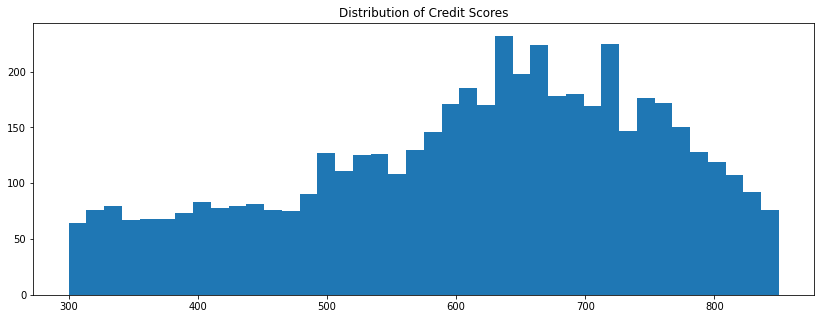

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14,5]
plt.title('Distribution of Credit Scores')
plt.hist(df['credit_score'], bins = 40)
plt.show()

In [ ]:
df[df["race"] == "white"]['credit_score']

1       812
2       604
6       617
14      695
18      791
       ... 
5017    410
5021    704
5024    848
5025    610
5026    644
Name: credit_score, Length: 1846, dtype: int64

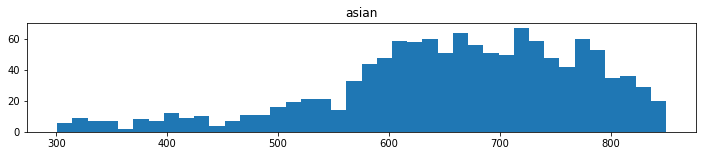

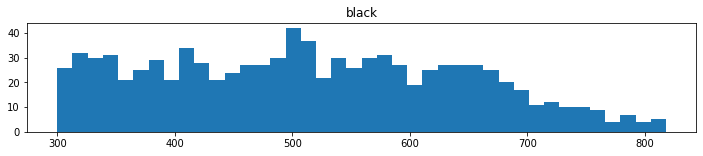

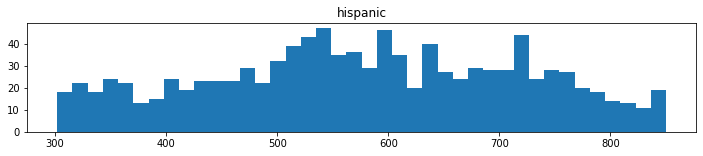

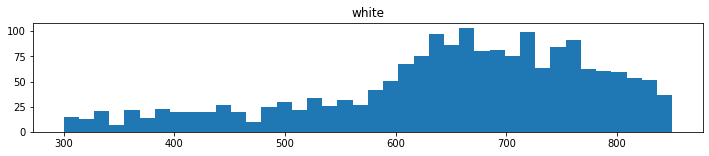

In [ ]:
for race in sorted(df['race'].unique()):
  plt.figure(figsize = [12,2])
  plt.title(race)
  plt.hist(df[df["race"] == race]['credit_score'], bins = 40)
  plt.show()

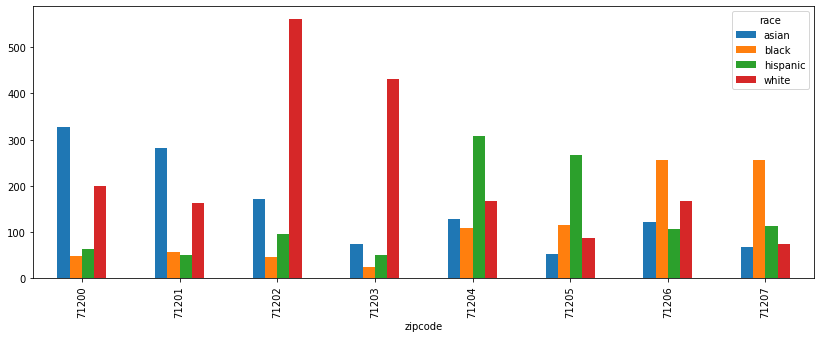

In [ ]:
crosstab_result = pd.crosstab(index = df['zipcode'], columns = df['race'])
crosstab_result.plot.bar()

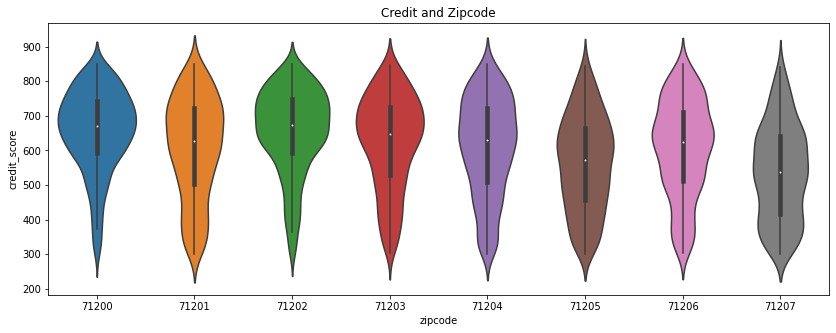

In [ ]:
import seaborn as sns
plt.title('Credit and Zipcode')
sns.violinplot(data = df, x = 'zipcode', y = 'credit_score')
plt.show()

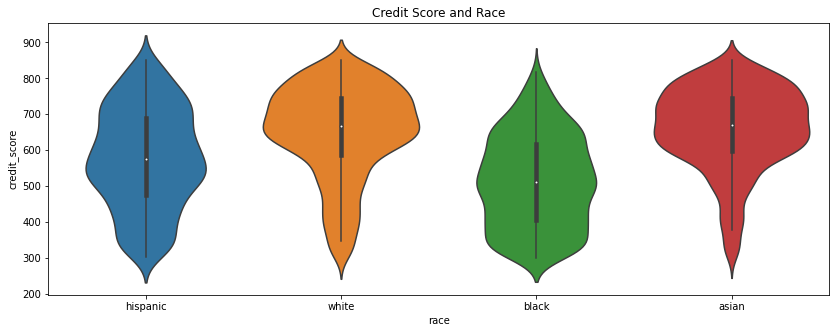

In [ ]:
import seaborn as sns
plt.title('Credit Score and Race')
sns.violinplot(data = df, x = 'race', y = 'credit_score')
plt.show()

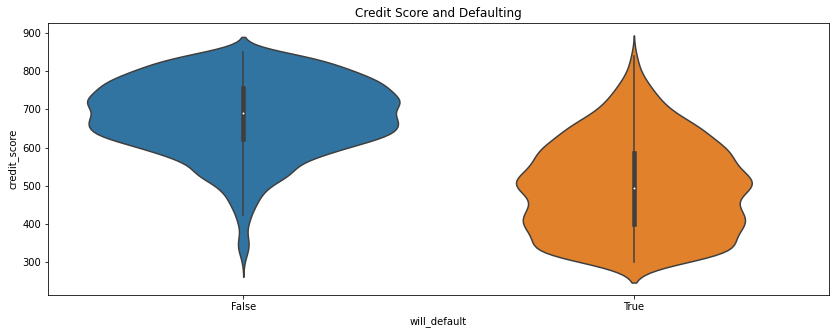

In [ ]:
import seaborn as sns
plt.title('Credit Score and Defaulting')
sns.violinplot(data = df, x = 'will_default', y = 'credit_score')
plt.show()

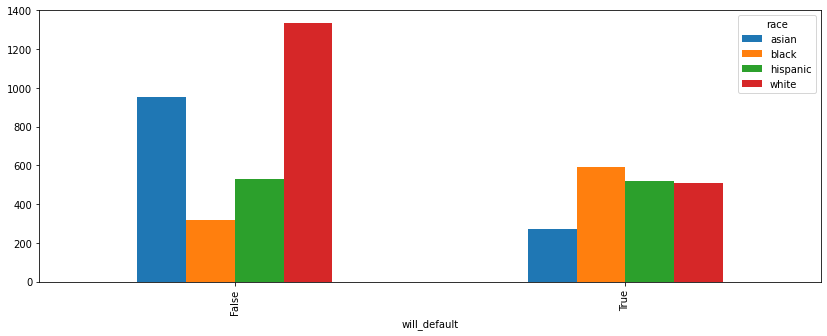

In [ ]:
crosstab_result = pd.crosstab(index = df['will_default'], columns = df['race'])
crosstab_result.plot.bar()

**Goal: create a machine learning algorithm - find a threshold of mortgage approval based on one's credit score which leads to the highest prediction accuracy.**

In [ ]:
def get_accuracy(predictions, correct_answers):
  return sum(predictions == correct_answers) / len(predictions)

In [ ]:
import numpy as np

correct_answers = np.array(['a', 'a', 'b', 'c'])
predictions = np.array(['a', 'a', 'b', 'a'])

get_accuracy(predictions, correct_answers)

0.75

In [ ]:
def predict(credit_score, threshold):
  return credit_score > threshold

In [ ]:
df['is_creditworthy'] = df['will_default'] == False

In [ ]:
steps = 20
threshold = 300
X = df['credit_score']
y = df['is_creditworthy']
initial_predictions = predict(X, threshold)
accuracy = get_accuracy(initial_predictions, y)

for i in range(steps):
  original_threshold = threshold
  print(f"Trying to improve our threshold for round {i}")
  higher_threshold = threshold + 100
  higher_threshold_predictions = predict(X, higher_threshold)
  higher_threshold_accuracy = get_accuracy(higher_threshold_predictions, y)
  print(f"if our threshold was {higher_threshold} then our accuracy would be {higher_threshold_accuracy}")

  if higher_threshold_accuracy > accuracy:
    print("Increasing threshold")
    accuracy = higher_threshold_accuracy
    threshold = higher_threshold

  if original_threshold == threshold:
    print("Didn't update threshold; finishing learning.")
    break
  
print(threshold)

Trying to improve our threshold for round 0
if our threshold was 400 then our accuracy would be 0.7119856887298748
Increasing threshold
Trying to improve our threshold for round 1
if our threshold was 500 then our accuracy would be 0.7928841184655138
Increasing threshold
Trying to improve our threshold for round 2
if our threshold was 600 then our accuracy would be 0.8048101769032001
Increasing threshold
Trying to improve our threshold for round 3
if our threshold was 700 then our accuracy would be 0.6438083879944345
Didn't update threshold; finishing learning.
600
